In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Скачаем данные о Среднемесячной номинальной начисленной заработной плате работников организаций по видам экономической деятельности в Российской Федерации за 2000-2016 гг. и 2017-2023 гг. 

In [83]:
salary1 = pd.read_csv('2000-2016.csv')
salary2 = pd.read_csv('2017-2023.csv')

In [84]:
salary1.head()

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Всего по экономике,2223.0,3240.0,4360.0,5498.0,6740.0,8555.0,10634.0,13593.0,17290.0,18638.0,20952.0,23369.0,26629.0,29792.0,32495.0,34030.0,36709.0
1,"Сельское хозяйство, охота и лесное хозяйство",985.0,1435.0,1876.0,2340.0,3015.0,3646.0,4569.0,6144.0,8475.0,9619.0,10668.0,12464.0,14129.0,15724.0,17724.0,19721.0,21755.0
2,"Рыболовство, рыбоводство",2846.0,3839.0,5031.0,5444.0,7085.0,10234.0,12311.0,14797.0,19499.0,22914.0,23782.0,25940.0,29201.0,32437.0,37062.0,46676.0,54927.0
3,Добыча полезных ископаемых,5940.0,9099.0,11081.0,13912.0,16842.0,19727.0,23145.0,28108.0,33206.0,35363.0,39895.0,45132.0,50401.0,54161.0,58959.0,63695.0,69936.0
4,из нее:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
salary2.head()

,Unnamed: 0,20171),2018,2019,2020,2021,20222),"20232), 3)"
0,Всего,39167.0,43724.0,47867.0,51344.0,57244.0,65338.0,73709.0
1,"сельское, лесное хозяйство, охота, рыболовст...",25671.0,28699.0,31728.0,34770.0,39437.0,46777.0,52868.0
2,в том числе:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"растениеводство и животноводство, охота и ...",23529.0,25820.0,28396.0,31058.0,35460.0,41994.0,47583.0
4,лесоводство и лесозаготовки,27617.0,32701.0,35426.0,37855.0,42152.0,48327.0,52416.0


Переименуем необходимые столбцы, чтобы они имели осмысленные названия

In [86]:
salary1.rename(columns={'Unnamed: 0': 'Вид экономической деятельности'}, inplace = True)
salary2.rename(columns={'Unnamed: 0': 'Вид экономической деятельности', '20171)': '2017', '20222)': '2022', '20232), 3)': '2023'}, inplace = True)

### Выберем следующие 3 вида экономической деятельности:
* #### Строительство
* #### Гостиницы и рестораны (с 2017 года деятельность гостиниц и предприятий общественного питания)
* #### Образование

In [87]:
salary1 = salary1.loc[salary1['Вид экономической деятельности'].isin(['Строительство', 'Гостиницы и рестораны', 'Образование'])]
salary2 = salary2.loc[salary2['Вид экономической деятельности'].isin(['строительство', 'деятельность гостиниц и предприятий общественного питания', 'образование'])]

Датафрейм salary2 содержит виды экономической деятельности, аналогичные тем, которые в датафрейме salary1. 
Поэтому для последующего объединения таблиц с заработными платами за 2000-2016 гг.(salary1) и 2017-2023 гг.(salary2) переименуем названия видов экономической деятельности в salary2 так, чтобы они стали такими же как и в salary1.

In [88]:
salary2.replace({'Вид экономической деятельности': {'строительство': 'Строительство', 'деятельность гостиниц и предприятий общественного питания': 'Гостиницы и рестораны', 'образование': 'Образование'}}, inplace = True)

Объединим таблицы, содержащие заработные платы за 2000-2016 гг.(salary1) и 2017-2023 гг.(salary2) в единую

In [89]:
salary = pd.merge(salary1, salary2, on = 'Вид экономической деятельности')

In [90]:
salary.head()

,Вид экономической деятельности,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Строительство,2640.0,3859.0,4807.0,6177.0,7305.0,9043.0,10869.0,14333.0,18574.0,...,29354.0,29960.0,32332.0,33678.0,38518.0,42630.0,44738.0,51944.0,60850.0,68944.0
1,Гостиницы и рестораны,1640.0,2404.0,3039.0,3967.0,4737.0,6033.0,7522.0,9339.0,11536.0,...,19759.0,20626.0,22041.0,23970.0,26241.0,28191.0,27411.0,33225.0,37572.0,43192.0
2,Образование,1240.0,1833.0,2927.0,3387.0,4203.0,5430.0,6983.0,8778.0,11317.0,...,25862.0,26928.0,28088.0,30258.0,34361.0,37072.0,39563.0,43390.0,48400.0,54263.0


Представим таблицу в более наглядном формате, поменяв столбцы и строки

In [91]:
salary = salary.melt(id_vars='Вид экономической деятельности', var_name='Год', value_name='Зарплата')

In [92]:
salary = salary.pivot(index='Год', columns='Вид экономической деятельности', values='Зарплата')

In [93]:
salary.head()

Вид экономической деятельности,Гостиницы и рестораны,Образование,Строительство
Год,,,
2000,1640.0,1240.0,2640.0
2001,2404.0,1833.0,3859.0
2002,3039.0,2927.0,4807.0
2003,3967.0,3387.0,6177.0
2004,4737.0,4203.0,7305.0


### Построим графики изменения зарплаты по годам для выбранных видов экономической деятельности

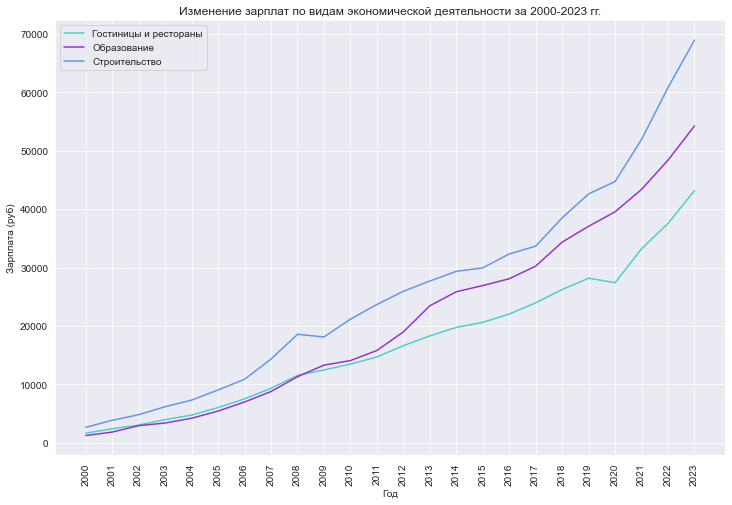

In [94]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
colors = ['mediumturquoise', 'darkorchid', 'cornflowerblue'] 
for i, column in enumerate(salary.columns[0:]):
    plt.plot(salary.index, salary[column], label = column, color=colors[i])
    
plt.xlabel('Год')
plt.ylabel('Зарплата (руб)')
plt.title('Изменение зарплат по видам экономической деятельности за 2000-2023 гг.')
plt.legend()
plt.xticks(rotation=90)
plt.show()

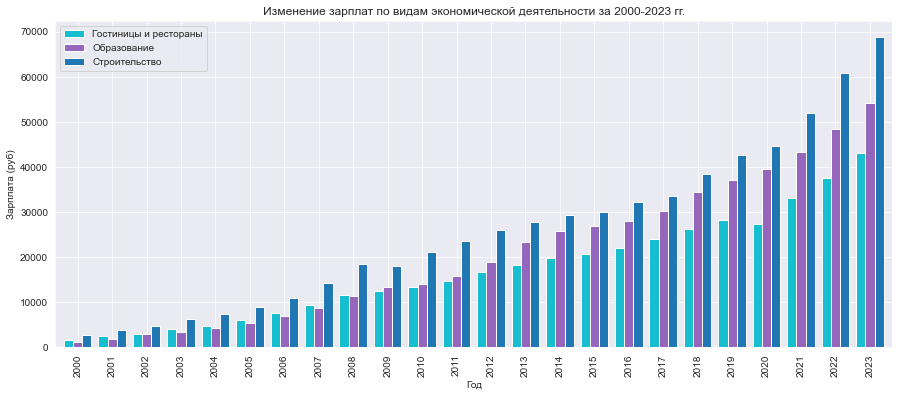

In [95]:
sns.set_style("darkgrid")
salary.plot(kind = 'bar', figsize = (15,6), width = 0.8, cmap = 'tab10_r')
plt.xlabel('Год')
plt.ylabel('Зарплата (руб)')
plt.title('Изменение зарплат по видам экономической деятельности за 2000-2023 гг.')
plt.legend()
plt.xticks(rotation=90)
plt.show()

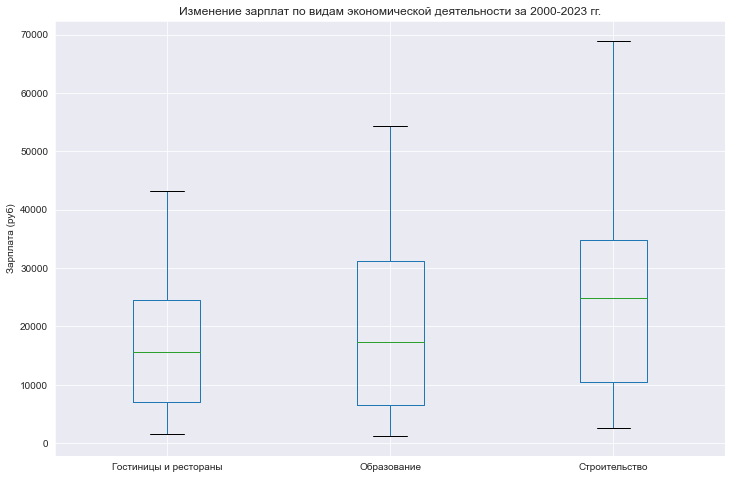

In [96]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
salary.boxplot()
plt.ylabel('Зарплата (руб)')
plt.title('Изменение зарплат по видам экономической деятельности за 2000-2023 гг.')
plt.show()

### Из построенных выше графиков можно сделать следующие выводы:
#### 1. Для всех трех видов экономической деятельности наблюдается тенденция роста зарплат в периоде с 2000 по 2023 гг., несмотря на некоторые случаи незначительного снижения зарплат в отдельные годы
#### 2. В сферах "Образование" и "Гостиницы и рестораны" заработная плата находилась приблизительно на одном уровне до 2008 года, далее наблюдается более быстрый рост зарплат в "Образовании" по сравнению с "Гостиницами и ресторанами", наиболее значительную разницу (выше 10 тысяч рублей) можно заметить начиная с 2020 г.
#### 3. В период с 2000 по 2023 гг. в сфере "Образование" заработная плата непрерывно возрастала, в сферах же "Строительство" и "Гостиницы и рестораны" наблюдается небольшое понижение зарплат в 2009 г. и в 2021 г. соответственно
#### 4. Каждый год с 2000 по 2023 зарплата в сфере "Строительство" была выше, чем в "Образовании" и "Гостиницах и ресторанах"
#### 5. Для всех трех видов экономической деятельности наиболее быстрый рост заработной платы за 24 года наблюдается с 2020 г.
#### 6. Наибольший рост заплаты с 2000 по 2023 гг. (более чем на 65 тысяч рублей) наблюдается в сфере "Строительство", наименьший (около 40 тысяч рублей) - в сфере "Гостиницы и рестораны", для сферы же "Образование" данный показатель  превышает 50 тысяч рублей
#### 7. В течение 18 лет (до 2017 г.) заработная плата в сфере "Строительство" составляла менее 35 тысяч рублей, в "Образовании" - менее 31 тысячи рублей, в "Гостиницах и ресторанах" - менее 25 тысяч рублей
#### 8. За последние 6 лет рассматриваемого периода наибольший рост зарплат (более чем на 30 тысяч рублей) прослеживается в "Строительстве"

### Пересчитаем средние зарплаты с учетом инфляции

Скачаем данные об уровне инфляции в стране

In [97]:
inflation = pd.read_excel('Инфляция.xlsx')

In [98]:
inflation.head()

,Год,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек,Всего
0,2024,7.44,7.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55
1,2023,11.76,10.97,3.51,2.30,2.50,3.24,4.30,5.13,6.00,6.68,7.47,7.42,7.42
2,2022,8.74,9.16,16.70,17.83,17.11,15.90,15.09,14.30,13.67,12.63,11.97,11.92,11.92
3,2021,5.19,5.67,5.78,5.52,6.01,6.51,6.47,6.69,7.41,8.14,8.40,8.39,8.39
4,2020,2.42,2.31,2.55,3.10,3.03,3.21,3.37,3.57,3.67,3.98,4.42,4.91,4.91


Нам необходимы годовые значения инфляции, поэтому удалим столбцы с данными об инфляции по месяцам, также удалим строку, содержащую значения инфляции за прошедшие месяцы 2024 года

In [99]:
inflation.drop(inflation.columns[1:-1], axis = 1, inplace = True)
inflation.drop(inflation.index[0], inplace = True)
inflation.rename(columns={'Всего': 'Инфляция'}, inplace = True)
inflation['Инфляция'] = inflation['Инфляция']/100
inflation.set_index('Год', inplace = True)
inflation = inflation.iloc[::-1]
inflation.head()

,Инфляция
Год,
2000,0.2020
2001,0.1858
2002,0.1506
2003,0.1199
2004,0.1174


Пресчитаем средние зарплаты с учетом инфляции 

In [100]:
salary_inflation = salary.div((inflation['Инфляция'].values+1), axis = 0)
salary_inflation.head()

Вид экономической деятельности,Гостиницы и рестораны,Образование,Строительство
Год,,,
2000,1364.392679,1031.613977,2196.339434
2001,2027.323326,1545.791870,3254.343060
2002,2641.230662,2543.890144,4177.820268
2003,3542.280561,3024.377177,5515.671042
2004,4239.305531,3761.410417,6537.497763


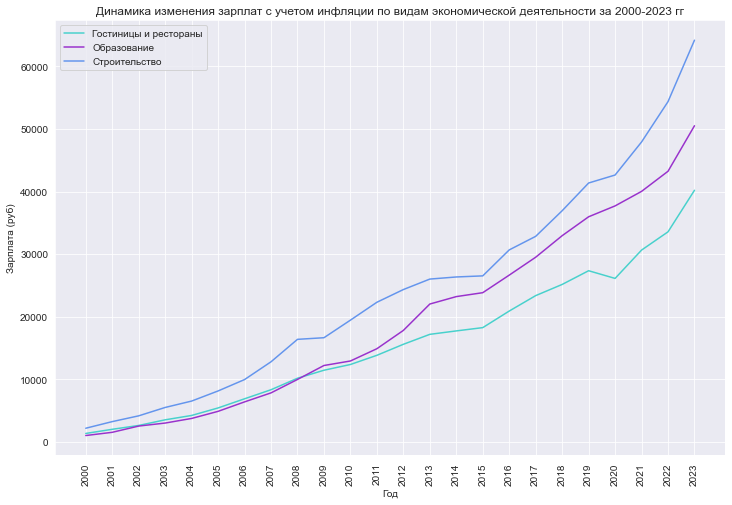

In [101]:
plt.figure(figsize=(12, 8))
colors = ['mediumturquoise', 'darkorchid', 'cornflowerblue'] 
for i, column in enumerate(salary_inflation.columns[0:]):
    plt.plot(salary_inflation.index, salary_inflation[column], label = column, color=colors[i])
    
plt.xlabel('Год')
plt.ylabel('Зарплата (руб)')
plt.title('Динамика изменения зарплат с учетом инфляции по видам экономической деятельности за 2000-2023 гг')
plt.legend()
plt.xticks(rotation=90)
plt.show()


#### В общем приведенный выше график изменения заработной платы с учетом инфляции схож с ранее построенным графиком изменения номинальной заработной платы, однако есть некоторые отличия: для сферы "Строительство" уровень зарплат в 2008 и 2009 гг. приблизительно одинаковый (без учета инфляции в 2009 г. наблюдался спад)

### Определим влияние инфляции на изменение зарплаты по сравнению с предыдущим годом

Для каждого года (с 2001 по 2023) вычислим изменение заработной платы по сравнению с предыдущим

In [102]:
infl_effect = pd.DataFrame()

for col in salary_inflation.columns[0:]:
    diff_col = col
    infl_effect[diff_col] = salary_inflation[col].diff()

infl_effect = infl_effect.dropna()

In [103]:
infl_effect.head()

,Гостиницы и рестораны,Образование,Строительство
Год,,,
2001,662.930647,514.177894,1058.003625
2002,613.907336,998.098274,923.477208
2003,901.049899,480.487032,1337.850774
2004,697.024970,737.033241,1021.826721
2005,1200.240047,1134.451092,1615.959996


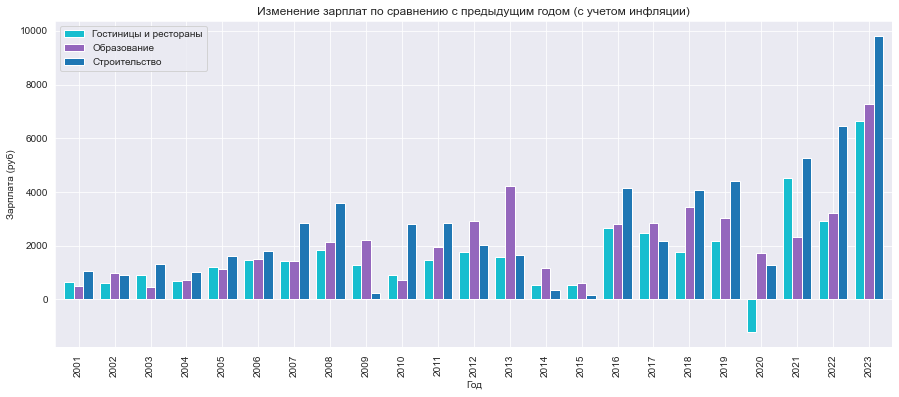

In [104]:
sns.set_style("darkgrid")
infl_effect.plot(kind = 'bar', figsize = (15,6), width = 0.8, cmap = 'tab10_r', grid = True)
    
plt.xlabel('Год')
plt.ylabel('Зарплата (руб)')
plt.title('Изменение зарплат по сравнению с предыдущим годом (с учетом инфляции)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Сделаем выводы из приведенного выше графика, отражающего изменение зарплат для каждого года по сравнению с предыдущим для выбранных видов экономической деятельности:
#### 1. Для сферы "Строительство" наименьший рост зарплаты (менее 500 рублей) по сравнению с предыдущим годом наблюдается в 2009, 2014 и 2015 гг.
#### 2. Уменьшение зарплаты по сравнению с предыдущим годом наблюдаем только 1 раз в 2020 г. в сфере "Гостиницы и рестораны"
#### 3. Для каждой из рассмотренных видов деятельности наибольшее увеличение заработной платы по сравнению с предыдущим годом произошло в 2023 году

### Построим график, отражающий динамику инфляции и номинальной зарплаты по видам экономической деятельности за 2000-2023 гг.

In [105]:
salary.index = salary.index.astype(int)
inflation.index = inflation.index.astype(int)

salary_inflation.index = salary_inflation.index.astype(int)
salary_inflation.index = salary_inflation.index.astype(int)

<Figure size 864x576 with 0 Axes>

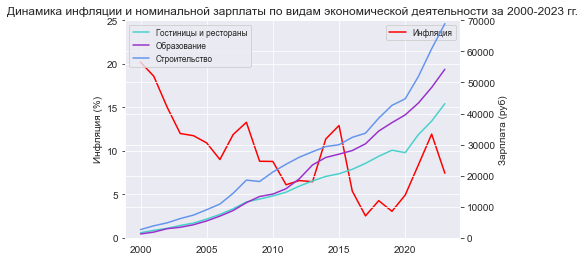

In [106]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
fig, ax1 = plt.subplots()
plt.title('Динамика инфляции и номинальной зарплаты по видам экономической деятельности за 2000-2023 гг.')

ax1.plot(inflation.index, inflation['Инфляция']*100, color = 'red', label = 'Инфляция')
ax1.set_ylabel('Инфляция (%)')
ax1.set_ylim(0, 25)
ax1.legend(fontsize='small')

ax2 = ax1.twinx()
colors = ['mediumturquoise', 'darkorchid', 'cornflowerblue'] 
for i, column in enumerate(salary.columns[0:]):
    ax2.plot(salary.index, salary[column], label = column, color=colors[i])
ax2.set_ylabel('Зарплата (руб)')
ax2.set_ylim(0, 70000)
ax2.legend(fontsize='small')

plt.show()


In [107]:
corr1 = inflation['Инфляция'].corr(salary_inflation['Гостиницы и рестораны'])
corr2 = inflation['Инфляция'].corr(salary_inflation['Образование'])
corr3 = inflation['Инфляция'].corr(salary_inflation['Строительство'])
values = np.array([corr1, corr2, corr3]) 
np.mean(values)

-0.6098555462814551

#### Из приведенного выше графика и вычисленного значения средней корреляции, можно сделать вывод, что наблюдается средняя отрицательная корреляция инфляции с динамикой номинальной зарплаты по 3 видам экономической деятельности в период с 2000 по 2023 гг.

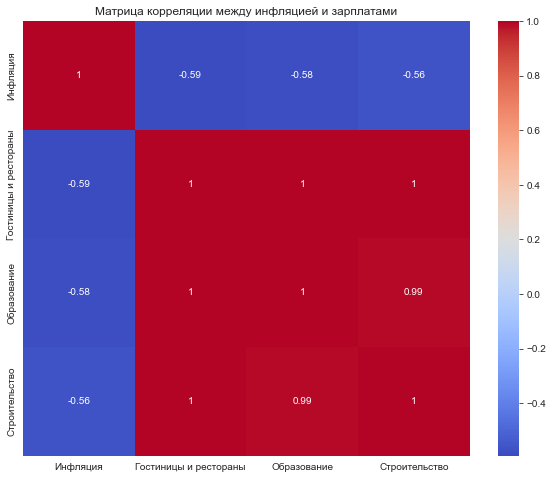

In [108]:
merged_df = pd.merge(inflation, salary, on='Год', how='inner')
corr_matrix = merged_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции между инфляцией и зарплатами')
plt.show()

In [109]:
unemployment = pd.read_excel('Безработица.xlsx')
unemployment.set_index('Год', inplace = True)
unemployment.head()

,"Уровень безработицы по РФ, %"
Год,
2000,10.6
2001,9.0
2002,7.9
2003,8.2
2004,7.8


<Figure size 864x576 with 0 Axes>

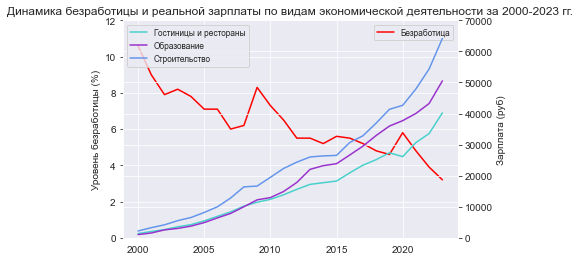

In [110]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
fig, ax1 = plt.subplots()
plt.title('Динамика безработицы и реальной зарплаты по видам экономической деятельности за 2000-2023 гг.')

ax1.plot(unemployment.index, unemployment['Уровень безработицы по РФ, %'], label = 'Безработица', color = 'red')
ax1.set_ylabel('Уровень безработицы (%)')
ax1.set_ylim(0, 12)
ax1.legend(fontsize='small')

ax2 = ax1.twinx()
colors = ['mediumturquoise', 'darkorchid', 'cornflowerblue'] 
for i, column in enumerate(salary.columns[0:]):
    ax2.plot(salary_inflation.index, salary_inflation[column], label = column, color=colors[i])
ax2.set_ylabel('Зарплата (руб)')
ax2.set_ylim(0, 70000)
ax2.legend(fontsize='small')

plt.show()


In [111]:
corr1 = unemployment['Уровень безработицы по РФ, %'].corr(salary_inflation['Гостиницы и рестораны'])
corr2 = unemployment['Уровень безработицы по РФ, %'].corr(salary_inflation['Образование'])
corr3 = unemployment['Уровень безработицы по РФ, %'].corr(salary_inflation['Строительство'])
values = np.array([corr1, corr2, corr3]) 
np.mean(values)

-0.8784435216030887

#### Из приведенного выше графика и вычисленного значения средней корреляции, можно сделать вывод, что наблюдается сильная отрицательная корреляция безработицы с динамикой реальной зарплаты по 3 видам экономической деятельности в период с 2000 по 2023 гг.

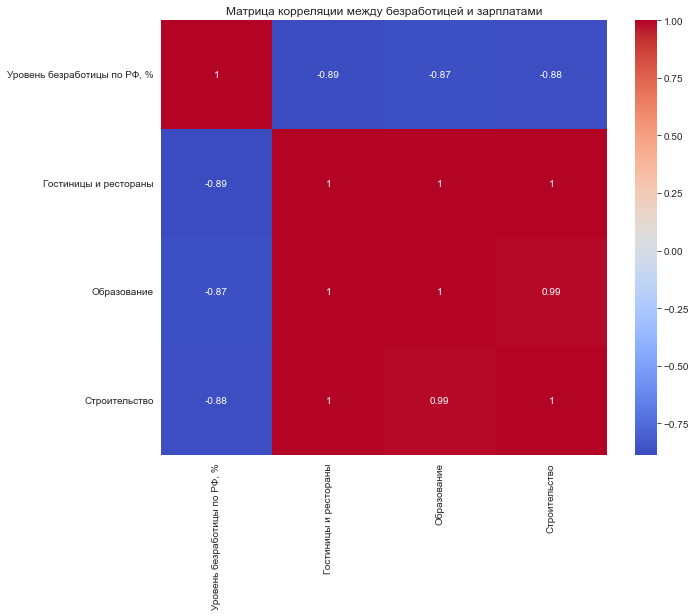

In [112]:
merged_df1 = pd.merge(unemployment, salary, on='Год', how='inner')
corr_matrix1 = merged_df1.corr()

# Создаем тепловую карту корреляции с использованием Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции между безработицей и зарплатами')
plt.show()